# Hide between lines

Resources
- http://www.psy.ritsumei.ac.jp/~akitaoka/kosaku4e.html

Inspiration
- https://twitter.com/AkiyoshiKitaoka/status/1256778042086526977


In [7]:
import numpy as np
from PIL import Image
from PIL import ImageChops

In [30]:
def crop_square(im):
    width, height = im.size
    new_size = min([width, height])

    left = (width - new_size) // 2
    top = (height - new_size) // 2
    right = (width + new_size) // 2
    bottom = (height + new_size) // 2

    delta = bottom-top - (right-left)
    bottom += delta
    
    # Crop the center of the image
    im = im.crop((left, top, right, bottom))

    # remove alpha if loaded is png
    im = Image.fromarray(np.array(im)[:, :, :3])
    return im


def blend(target_im_path, base_im_path, alpha):
    im_base_orig = Image.open(base_im_path)
    im_target = crop_square(Image.open(target_im_path))
    new_size, _ = im_target.size

    im_base = im_base_orig.copy()
    im_base.thumbnail((new_size, new_size), Image.ANTIALIAS)

    float_alpha = alpha if alpha < 1 else alpha / 100
    im_target_np = np.array(im_target)
    alphaed = (float_alpha * im_target_np + 255 * np.ones(im_target_np.shape) * (1 - float_alpha)).astype(np.uint8)
    im_target_alpha = Image.fromarray(alphaed)

    assert im_base.size == im_target.size

    blended = ImageChops.darker(im_base, im_target_alpha)
    return blended

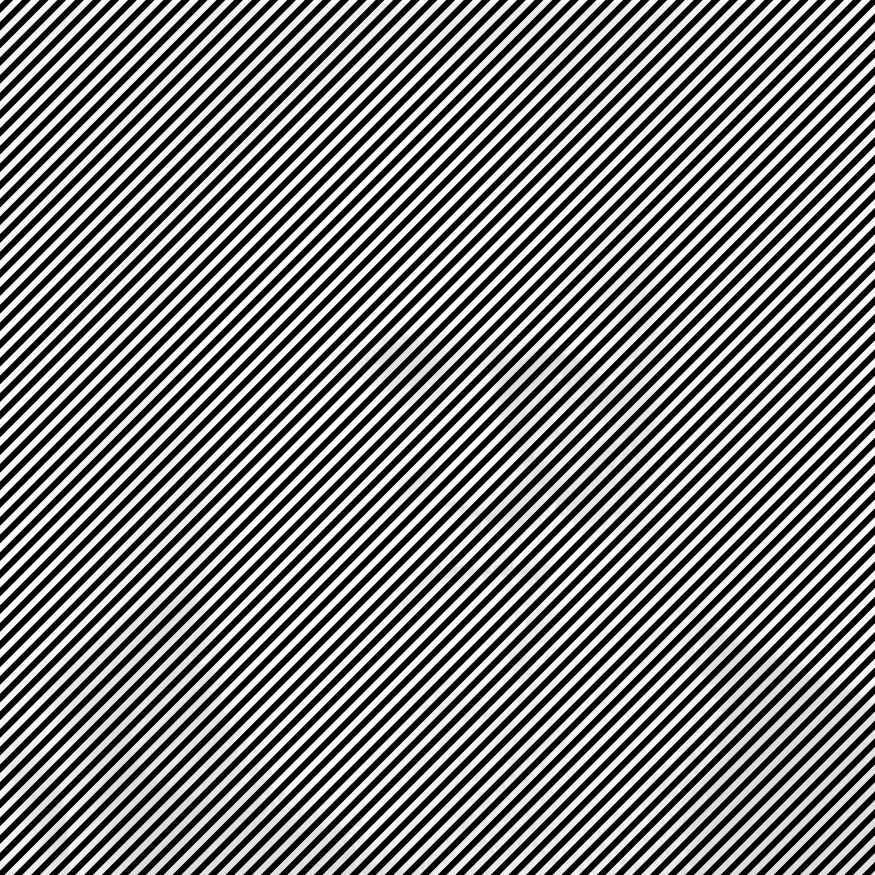

In [31]:
blend('./darwin.jpg', './base_diagonal.jpg', 0.15)